In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

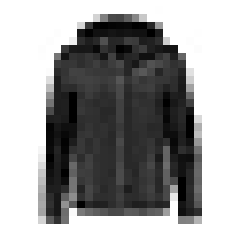

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

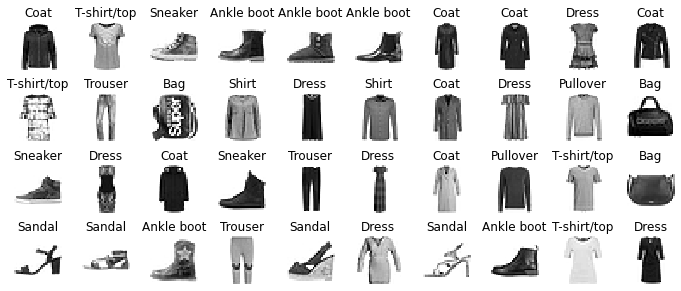

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [12]:
X_train_full.shape
X_train.shape


(55000, 28, 28)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.layers import Flatten


history = History()
model = Sequential()
# model.add(Dense(300,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Flatten(input_shape=(X_train.shape[1],28)))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# model.fit(train_images, train_labels, epochs=10)
# history = model.fit(X_train_full, y_train_full, epochs=30)
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50


/home/zuza/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 5s 3ms/step - loss: 0.5629 - accuracy: 0.8054 - val_loss: 0.4148 - val_accuracy: 0.8530
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3855 - accuracy: 0.8603 - val_loss: 0.3697 - val_accuracy: 0.8660
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3471 - accuracy: 0.8735 - val_loss: 0.3403 - val_accuracy: 0.8760
Epoch 4/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3224 - accuracy: 0.8815 - val_loss: 0.3313 - val_accuracy: 0.8802
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3011 - accuracy: 0.8897 - val_loss: 0.3131 - val_accuracy: 0.8846
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.8937 - val_loss: 0.3170 - val_accuracy: 0.8872
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.8995 - val_loss: 0.3015 - val_accuracy: 0.8908
Epo

In [15]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.11801077, -0.26368985,  0.59442574, ..., -0.4402501 ,
         0.906283  ,  0.15998599],
       [-0.00908275,  0.54197085,  1.1663964 , ..., -0.48894095,
         0.60477865, -0.94414103],
       [-0.9034054 ,  0.4032211 ,  0.63155484, ..., -0.03091092,
        -0.73170936, -1.6220189 ],
       ...,
       [-0.994611  , -0.51997536,  0.14252907, ..., -0.8778588 ,
        -2.646082  , -0.3286484 ],
       [-0.50754267, -0.62113   , -0.33140248, ..., -0.1948068 ,
        -1.6803626 , -0.08776715],
       [ 0.45472506,  0.8108249 ,  0.28695017, ..., -0.6235785 ,
        -1.077119  ,  0.28148347]], dtype=float32)

In [17]:
print(weights.shape)

(784, 300)


In [18]:
biases

array([-0.02169702,  0.3037201 ,  0.7061654 ,  0.22245285,  0.1312781 ,
        0.06189788, -0.3744362 ,  0.46789715,  0.3560416 ,  0.09175451,
        0.12065644, -0.10741568,  0.48746756, -0.8519424 , -0.2875056 ,
        0.06482007, -0.25078154,  0.21489024, -0.3927753 ,  0.33356085,
       -0.09125956, -0.06133928,  0.22186336, -0.11569786, -0.38934067,
        0.11681705,  0.2695005 ,  0.26238936,  0.0090266 ,  0.20862414,
       -0.29886064,  0.0861413 ,  0.06968261,  0.27828178, -0.0184404 ,
        0.18592565, -0.17978747,  0.31194267,  0.05731108,  0.22425897,
       -0.21888214,  0.03037385,  0.31986293,  0.20496126, -0.4959161 ,
       -0.17625882,  0.05492507, -0.15855274, -0.16116735, -0.2155597 ,
       -0.25141886,  0.29832947,  0.34315923, -0.08218858, -0.5193699 ,
        0.13760097,  0.08434943, -0.17262575,  0.10019565, -0.7344608 ,
       -0.15111597,  0.11615569,  0.08930999, -0.21827349,  0.27136672,
       -0.07059918, -0.24881943,  0.51772416,  0.05331222, -0.58

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [235]:
# history.params

In [236]:
# print(history.epoch)

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

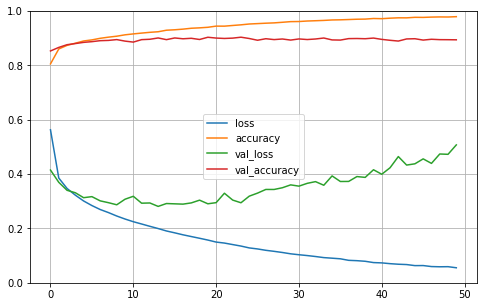

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [239]:
# model.evaluate(X_test, y_test)

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 1.  ],
       [0.67, 0.  , 1.  , 0.  , 0.54, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [24]:
np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

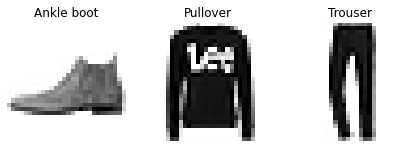

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()